## Leitura do dataset:

In [908]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

nome_real_do_arquivo = 'spotify-2023.csv' 
caminho_do_arquivo = f'../data/raw/{nome_real_do_arquivo}'


df = pd.read_csv(
    caminho_do_arquivo,
    sep=',',           
    encoding='latin-1',
    low_memory=False
)


## Transformação de tipos:

In [909]:
#Transformação de int para float nas porcentagens
cols_pct = [
    'danceability_%',
    'valence_%',
    'energy_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%'
]
df[cols_pct] = df[cols_pct].astype(float)

#Transformação dos tipos key e mode para category para economizar memoria
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')

#Transformação das colunas de released em apenas uma coluna chamada releasedData
df['released_date'] = pd.to_datetime(
    df['released_year'].astype(str) + '-' +
    df['released_month'].astype(str) + '-' +
    df['released_day'].astype(str),
    errors='coerce'
)
df = df.drop(columns=['released_year', 'released_month', 'released_day'])

#Transformação do tipo do atributo stream para númerico
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_apple_charts'] = pd.to_numeric(df['in_apple_charts'], errors='coerce')
df['in_deezer_charts'] = pd.to_numeric(df['in_deezer_charts'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

## Composição dos dados:

In [910]:

# Definindo as colunas da tabela de metadados
colunas_tabela = ['Nome da Variável', 'Tipo', 'Descrição', 'Unidades', 'Valores Faltantes']

# Lista com metadados do dataset Spotify 2023
data_spotify = [

    ['track_name', 'Textual', 'Nome da música.', 'N/A', df['track_name'].isna().sum()],
    ['artist(s)_name', 'Textual', 'Nome dos artistas.', 'N/A', df['artist(s)_name'].isna().sum()],
    ['artist_count', 'Numérico Discreto', 'Quantidade de artistas envolvidos.', 'Contagem', df['artist_count'].isna().sum()],

    ['released_date', 'Data', 'Data completa de lançamento.', 'Data', df['released_date'].isna().sum()],

    ['in_spotify_playlists', 'Numérico Discreto', 'Quantidade de playlists do Spotify contendo a música.', 'Contagem', df['in_spotify_playlists'].isna().sum()],
    ['in_spotify_charts', 'Numérico Discreto', 'Posição ou presença em charts do Spotify.', 'Contagem', df['in_spotify_charts'].isna().sum()],
    ['streams', 'Numérico Discreto', 'Total de streams da música.', 'Contagem', df['streams'].isna().sum()],

    ['in_apple_playlists', 'Numérico Discreto', 'Quantidade de playlists da Apple contendo a música.', 'Contagem', df['in_apple_playlists'].isna().sum()],
    ['in_apple_charts', 'Numérico Discreto', 'Posição ou presença em charts da Apple.', 'Contagem', df['in_apple_charts'].isna().sum()],

    ['in_deezer_playlists', 'Numérico Discreto', 'Quantidade de playlists do Deezer contendo a música.', 'Contagem', df['in_deezer_playlists'].isna().sum()],
    ['in_deezer_charts', 'Numérico Discreto', 'Posição ou presença em charts do Deezer.', 'Contagem', df['in_deezer_charts'].isna().sum()],

    ['in_shazam_charts', 'Numérico Discreto', 'Posição ou presença nos charts do Shazam.', 'Contagem', df['in_shazam_charts'].isna().sum()],

    ['bpm', 'Numérico Contínuo', 'Batidas por minuto da música.', 'BPM', df['bpm'].isna().sum()],
    ['key', 'Categórico', 'Tom da música.', 'N/A', df['key'].isna().sum()],
    ['mode', 'Categórico Binário', 'Modo musical (maior=1, menor=0).', 'N/A', df['mode'].isna().sum()],

    ['danceability_%', 'Numérico Contínuo', 'Quão dançante é a música.', '%', df['danceability_%'].isna().sum()],
    ['valence_%', 'Numérico Contínuo', 'Valência emocional.', '%', df['valence_%'].isna().sum()],
    ['energy_%', 'Numérico Contínuo', 'Energia geral da música.', '%', df['energy_%'].isna().sum()],
    ['acousticness_%', 'Numérico Contínuo', 'Quantidade de acústica.', '%', df['acousticness_%'].isna().sum()],
    ['instrumentalness_%', 'Numérico Contínuo', 'Probabilidade de ser instrumental.', '%', df['instrumentalness_%'].isna().sum()],
    ['liveness_%', 'Numérico Contínuo', 'Probabilidade de ser ao vivo.', '%', df['liveness_%'].isna().sum()],
    ['speechiness_%', 'Numérico Contínuo', 'Presença de fala na música.', '%', df['speechiness_%'].isna().sum()]
]


# Criando DataFrame com as informações
df_atributos = pd.DataFrame(data=data_spotify, columns=colunas_tabela)

# Exportando para CSV 
df_atributos.to_csv('spotify_metadata.csv', index=False, encoding='utf-8-sig', sep=';')



instancias, atributos = df.shape

print("Instâncias:", instancias)
print("Atributos:", atributos)
print("Periodo de tempo: 2023")
df_atributos

Instâncias: 953
Atributos: 22
Periodo de tempo: 2023


,Nome da Variável,Tipo,Descrição,Unidades,Valores Faltantes
0,track_name,Textual,Nome da música.,N/A,0
1,artist(s)_name,Textual,Nome dos artistas.,N/A,0
2,artist_count,Numérico Discreto,Quantidade de artistas envolvidos.,Contagem,0
3,released_date,Data,Data completa de lançamento.,Data,0
4,in_spotify_playlists,Numérico Discreto,Quantidade de playlists do Spotify contendo a ...,Contagem,0
5,in_spotify_charts,Numérico Discreto,Posição ou presença em charts do Spotify.,Contagem,0
6,streams,Numérico Discreto,Total de streams da música.,Contagem,1
7,in_apple_playlists,Numérico Discreto,Quantidade de playlists da Apple contendo a mú...,Contagem,0
8,in_apple_charts,Numérico Discreto,Posição ou presença em charts da Apple.,Contagem,0
9,in_deezer_playlists,Numérico Discreto,Quantidade de playlists do Deezer contendo a m...,Contagem,0


## Tratamento de dados faltantes e duplicados:

In [911]:
#tratando os dados inexistentes da coluna key
df['key'] = df['key'].cat.add_categories('Unknown')
df['key'] = df['key'].fillna('Unknown').astype('category')

#tratando os dados inexistentes da coluna in_shazam_charts
df.replace({'in_shazam_charts': ['', ' ', 'nan', 'NULL', 'NA']}, np.nan, inplace=True)
df = df.dropna(subset=['in_shazam_charts'])

#tratando os dados inexistentes da coluna streams
df.replace({'streams': ['', ' ', 'nan', 'NULL', 'NA']}, np.nan, inplace=True)
df = df.dropna(subset=['streams'])

missing = df.isnull().sum().to_frame("faltantes")
missing["percentual"] = (missing["faltantes"] / len(df)) * 100
print(missing)

#verificação de linha duplicada
duplicatas = df.duplicated()
print("Número de linhas duplicadas:", duplicatas.sum())



df.head(10)


                      faltantes  percentual
track_name                    0         0.0
artist(s)_name                0         0.0
artist_count                  0         0.0
in_spotify_playlists          0         0.0
in_spotify_charts             0         0.0
streams                       0         0.0
in_apple_playlists            0         0.0
in_apple_charts               0         0.0
in_deezer_playlists           0         0.0
in_deezer_charts              0         0.0
in_shazam_charts              0         0.0
bpm                           0         0.0
key                           0         0.0
mode                          0         0.0
danceability_%                0         0.0
valence_%                     0         0.0
energy_%                      0         0.0
acousticness_%                0         0.0
instrumentalness_%            0         0.0
liveness_%                    0         0.0
speechiness_%                 0         0.0
released_date                 0 

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703.0,43,263,45,10,...,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286.0,48,126,58,14,...,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974.0,94,207,91,14,...,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817.0,116,207,125,12,...,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322.0,84,133,87,15,...,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0,2023-05-18
5,Sprinter,"Dave, Central Cee",2,2186,91,183706234.0,67,213,88,17,...,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0,2023-06-01
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,3090,50,725980112.0,34,222,43,13,...,F,Minor,67.0,83.0,76.0,48.0,0.0,8.0,3.0,2023-03-16
7,Columbia,Quevedo,1,714,43,58149378.0,25,89,30,13,...,F,Major,67.0,26.0,71.0,37.0,0.0,11.0,4.0,2023-07-07
8,fukumean,Gunna,1,1096,83,95217315.0,60,210,48,11,...,C#,Minor,85.0,22.0,62.0,12.0,0.0,28.0,9.0,2023-05-15
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2953,44,553634067.0,49,110,66,13,...,D,Minor,81.0,56.0,48.0,21.0,0.0,8.0,33.0,2023-03-17


## Estatísticas e visualizações simples sobre os conjuntos de dados:

### Identificação de Outliers em relação ao número de streams

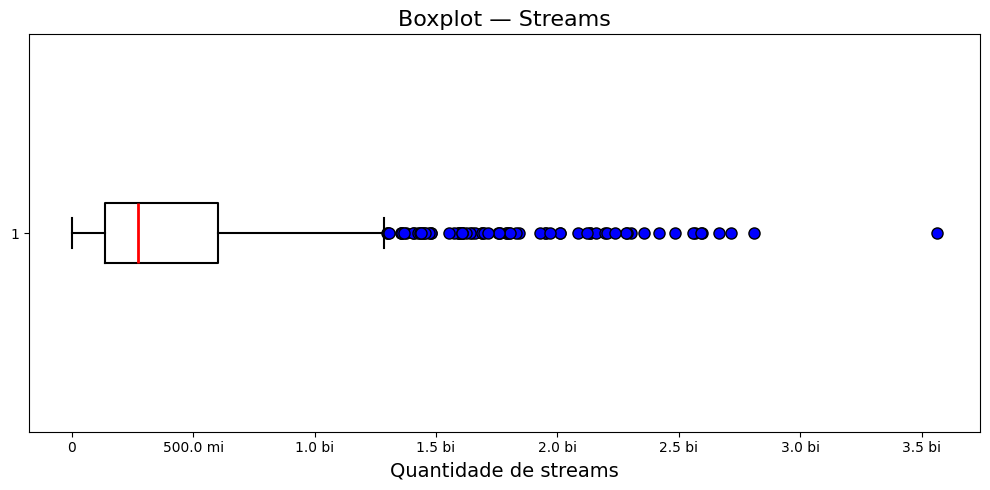

In [912]:
def formatar_bilhoes(x, pos):
    if x >= 1e9:
        return f"{x/1e9:.1f} bi"
    elif x >= 1e6:
        return f"{x/1e6:.1f} mi"
    elif x >= 1e3:
        return f"{x/1e3:.1f} mil"
    return f"{x:.0f}"

plt.figure(figsize=(10, 5))

plt.boxplot(
    df['streams'].dropna(),
    vert=False,
    boxprops=dict(linewidth=1.5),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    medianprops=dict(color='red', linewidth=2),
    flierprops=dict(
        marker='o', 
        markersize=8, 
        markeredgecolor='black', # Cor da borda
        markerfacecolor='blue' # Cor do preenchimento
    )
)

plt.title("Boxplot — Streams", fontsize=16)
plt.xlabel("Quantidade de streams", fontsize=14)

# Aplicar formatação personalizada
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))

plt.tight_layout()
plt.show()

### Top 10 artistas mais ouvidos em 2023:

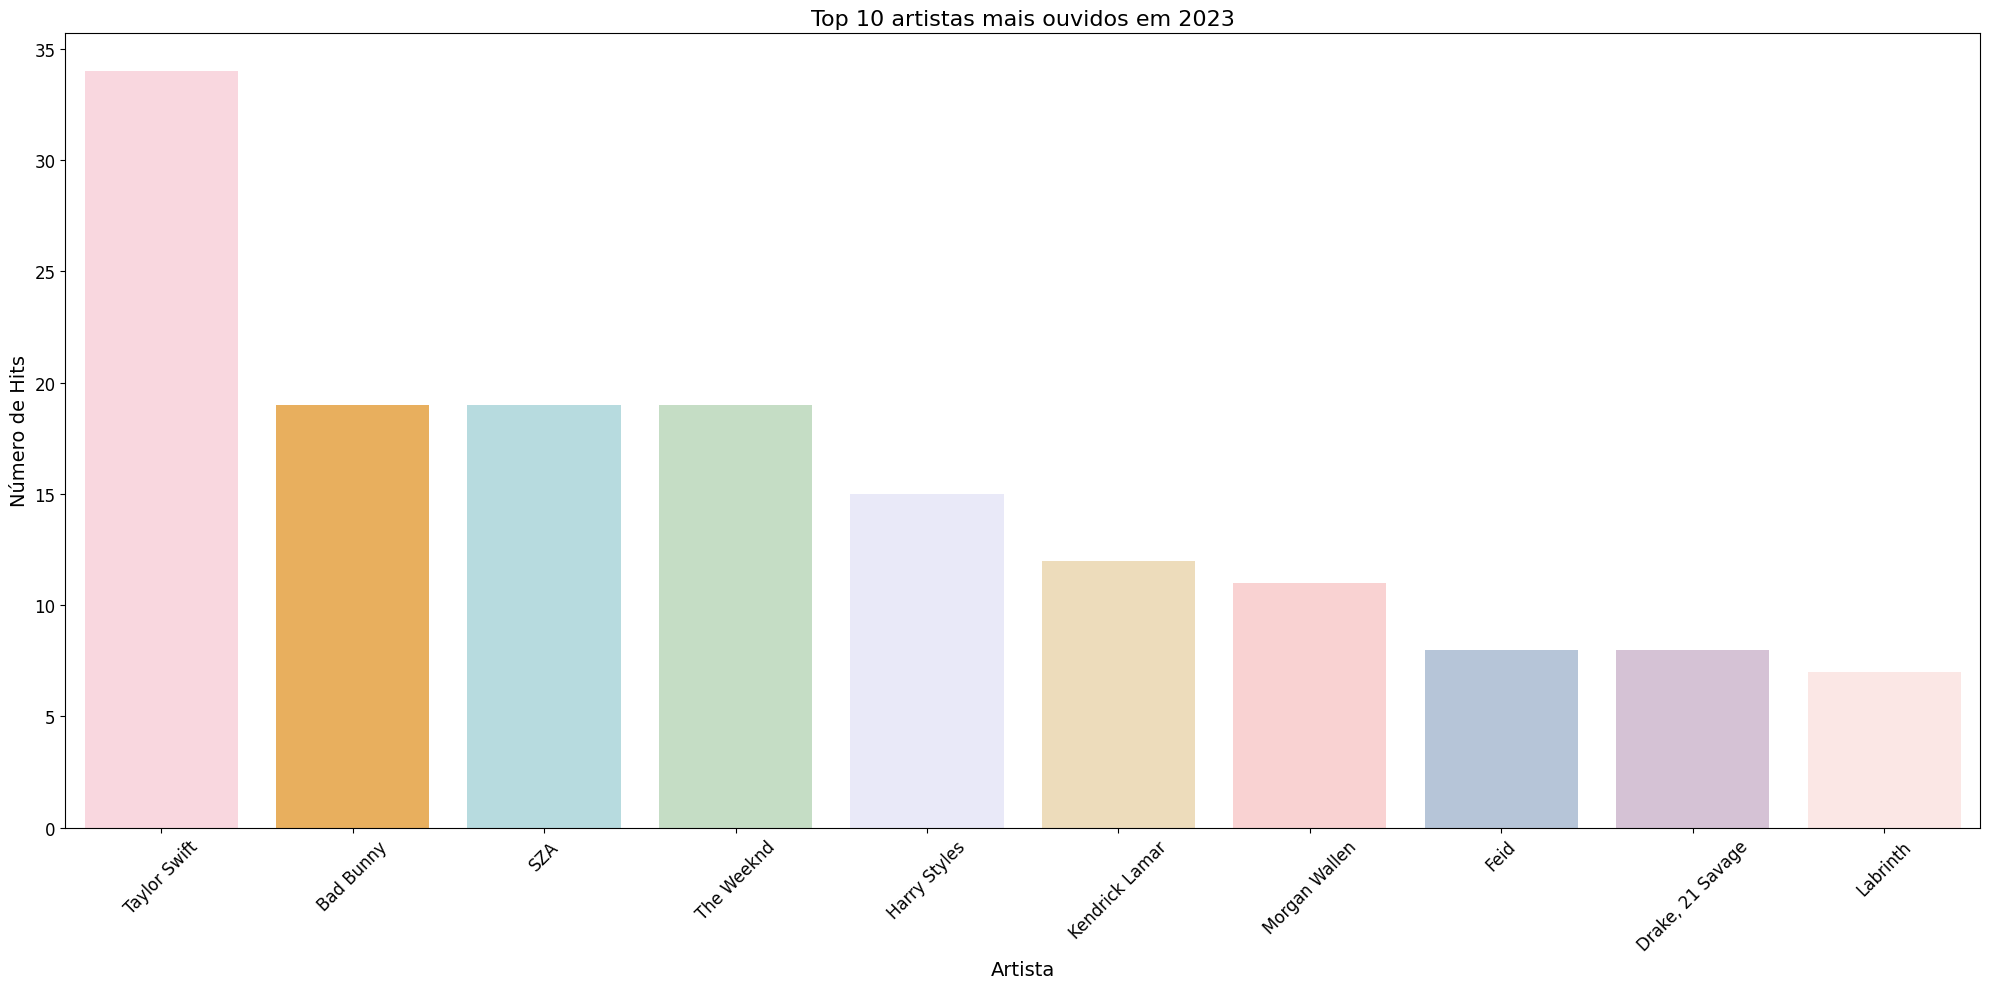

In [913]:

artist_counts = df['artist(s)_name'].value_counts()
top_artists = artist_counts.head(10)
colors = ['#FFD1DC', '#FFB347', '#B0E0E6', '#C1E1C1', '#E6E6FA',
          '#F5DEB3', '#FFCCCC', '#B0C4DE', '#D8BFD8', '#FFE4E1']

plot_data = pd.DataFrame({
    'artist': top_artists.index,
    'hits': top_artists.values,
    'color': colors 
})

plt.figure(figsize=(20,10))
sns.barplot(
    x='artist',
    y='hits',
    data=plot_data,
    hue='artist',      
    palette=colors,     
    dodge=False
)
plt.legend([],[], frameon=False)
plt.title('Top 10 artistas mais ouvidos em 2023', fontsize=16)
plt.xlabel('Artista', fontsize=14)
plt.ylabel('Número de Hits', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()


### Top 10 músicas mais ouvidas em 2023:

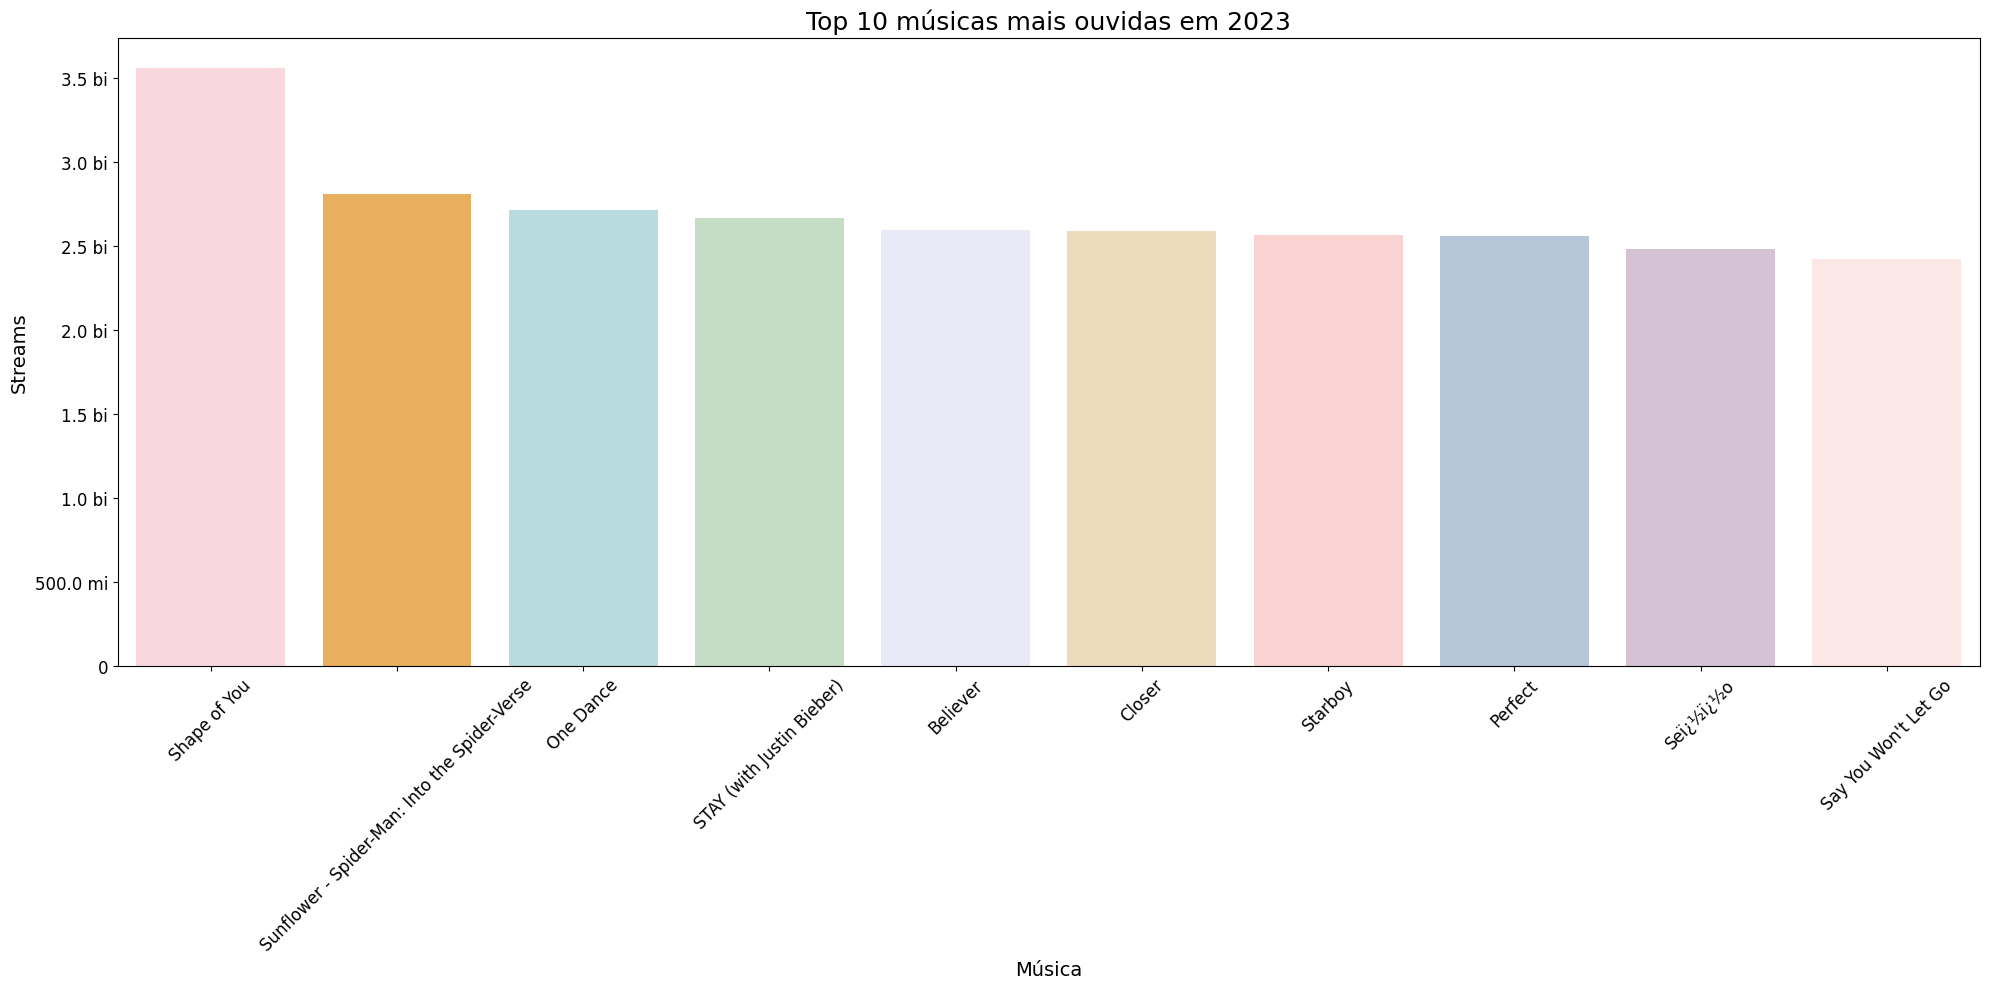

In [914]:

top_songs = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

colors = ['#FFD1DC', '#FFB347', '#B0E0E6', '#C1E1C1', '#E6E6FA',
          '#F5DEB3', '#FFCCCC', '#B0C4DE', '#D8BFD8', '#FFE4E1']

plot_data = pd.DataFrame({
    'track': top_songs['track_name'],
    'streams': top_songs['streams'],
    'color': colors
})

plt.figure(figsize=(20, 10))

sns.barplot(
    x='track',
    y='streams',
    data=plot_data,
    hue='track',       
    palette=colors,
    dodge=False
)

plt.legend([], [], frameon=False)
plt.title('Top 10 músicas mais ouvidas em 2023', fontsize=18)
plt.xlabel('Música', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))

plt.tight_layout()
plt.show()


### Relação entre músicas mais ouvidas x músicas mais dançantes

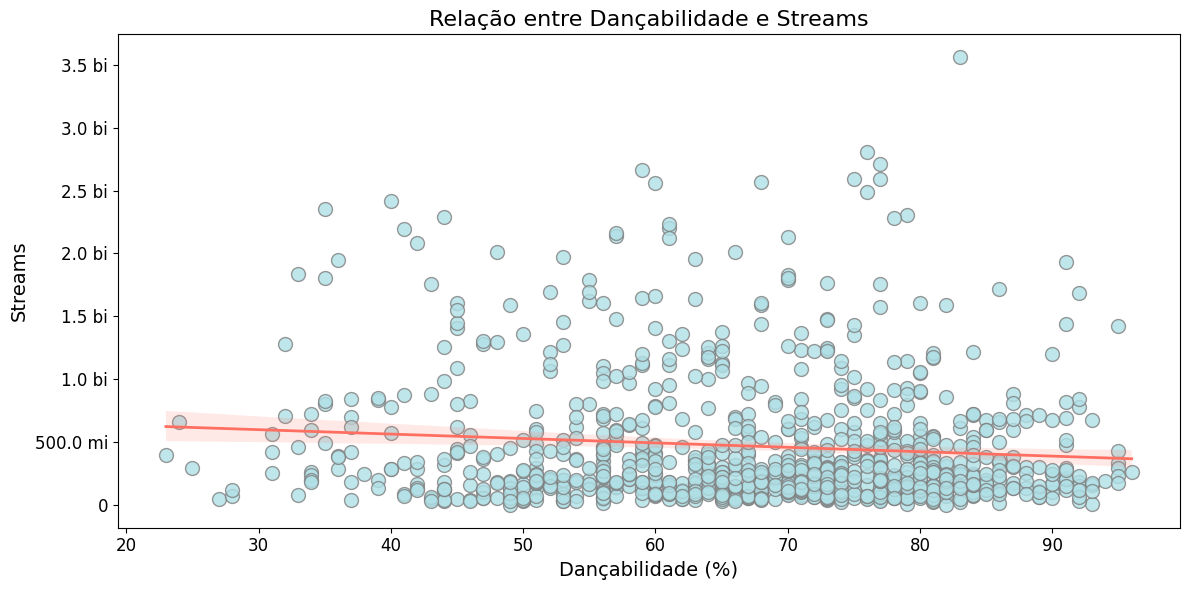

In [915]:
plt.figure(figsize=(12,6))

# Scatter com linha de tendência
sns.regplot(
    x='danceability_%',
    y='streams',
    data=df,
    scatter=True,
    scatter_kws={
        's':100,          
        'color':'#B0E0E6',
        'edgecolor':'gray',
        'alpha':0.8
    },
    line_kws={
        'color':'#FF6F61', 
        'linewidth':2
    }
)

plt.title('Relação entre Dançabilidade e Streams', fontsize=16)
plt.xlabel('Dançabilidade (%)', fontsize=14)
plt.ylabel('Streams', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))
plt.tight_layout()
plt.show()


## Perguntas acerca dos dados:

### 1 - Qual plataforma apresenta maior número de streams?

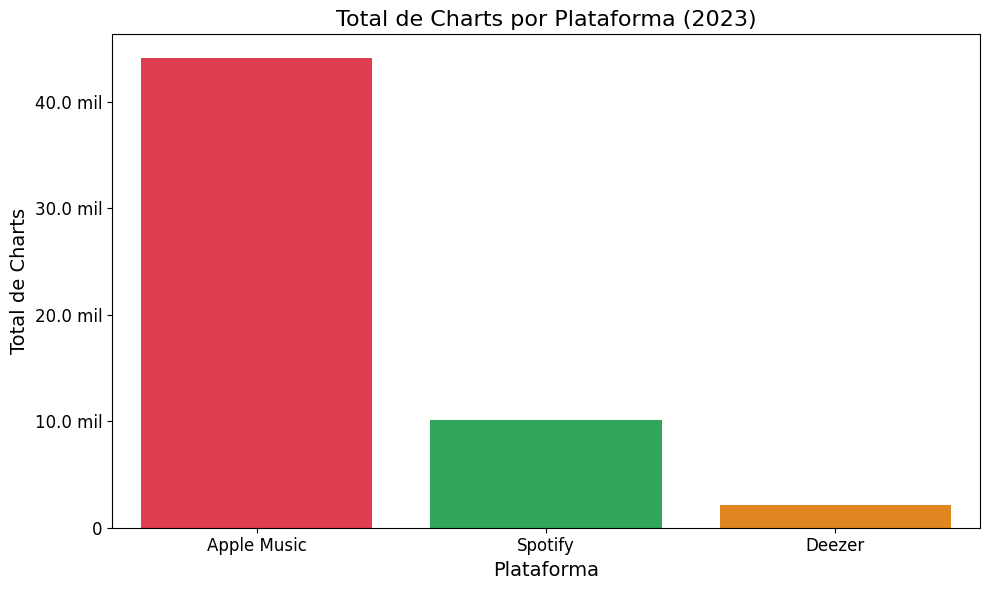

In [916]:
# Somar total de charts sem Shazam
total_stream = {
    'Apple Music': df['in_apple_charts'].sum(),
    'Spotify': df['in_spotify_charts'].sum(),
    'Deezer': df['in_deezer_charts'].sum()
}

stream_df = pd.DataFrame(list(total_stream.items()), columns=['Plataforma', 'Total Charts'])

plt.figure(figsize=(10,6))

sns.barplot(
    x='Plataforma',
    y='Total Charts',
    data=stream_df,
    hue='Plataforma',
    palette=['#FA233B', '#1DB954', '#FF8800'], 
    dodge=False,
    legend=False
)

plt.title("Total de Charts por Plataforma (2023)", fontsize=16)
plt.xlabel("Plataforma", fontsize=14)
plt.ylabel("Total de Charts", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_bilhoes))

plt.tight_layout()
plt.show()

### 2 - Os artistas com o maior número de streams são os mesmos que têm a maior presença em charts?

### 3 - Artistas com maior colaborações tendem a ter mais streams ou mais inclusões em playlists em comparação com faixas de artistas solo?

### 4 - Qual dia da semana as faixas mais bem-sucedidas de 2023 foram lançadas?